In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Step 1: Load the dataset 
df = pd.read_csv("disease_info_doctors.csv")

In [ ]:
df.head

<bound method NDFrame.head of         Doctor Name       Specialization  \
0     Dr. A. Sharma           Cardiology   
1      Dr. B. Gupta        Endocrinology   
2      Dr. C. Menon          Pulmonology   
3      Dr. D. Singh          Dermatology   
4        Dr. E. Rao            Neurology   
5       Dr. F. Khan          Orthopedics   
6      Dr. G. Patil     Gastroenterology   
7      Dr. H. Reddy             Oncology   
8      Dr. I. Joshi        Ophthalmology   
9     Dr. J. Pillai           Psychiatry   
10     Dr. K. Kumar              Urology   
11     Dr. L. Mehta         Rheumatology   
12     Dr. M. Verma           Hematology   
13     Dr. N. Desai           Pediatrics   
14      Dr. O. Bhat  Infectious Diseases   
15    Dr. P. Kapoor           Nephrology   
16      Dr. Q. Iyer           Hepatology   
17  Dr. R. Malhotra                  ENT   
18    Dr. S. Thomas           Gynecology   
19  Dr. T. Banerjee           Immunology   

                                             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Doctor Name        20 non-null     object 
 1   Specialization     20 non-null     object 
 2   Symtoms            20 non-null     object 
 3   Disease Expertise  20 non-null     object 
 4   Clinic/Hospital    20 non-null     object 
 5   Latitude           20 non-null     float64
 6   Longitude          20 non-null     float64
 7   Contact            20 non-null     int64  
 8   Working Hours      20 non-null     object 
 9   Ratings            20 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.7+ KB


In [ ]:
df.isna().sum()

Doctor Name          0
Specialization       0
Symtoms              0
Disease Expertise    0
Clinic/Hospital      0
Latitude             0
Longitude            0
Contact              0
Working Hours        0
Ratings              0
dtype: int64

array([[<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Contact'}>,
        <Axes: title={'center': 'Ratings'}>]], dtype=object)

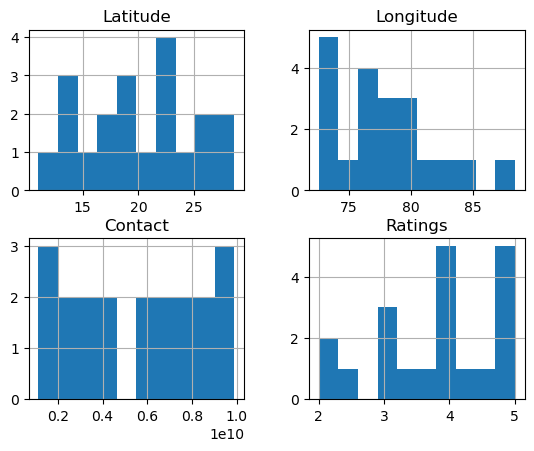

In [ ]:
df.hist()

In [ ]:
df['Longitude'].value_counts()

Longitude
77.2090    1
72.8777    1
79.4192    1
80.6480    1
78.4867    1
72.9781    1
79.0882    1
77.4126    1
75.8577    1
75.7873    1
82.9739    1
76.9558    1
73.7125    1
75.7139    1
73.8567    1
72.5714    1
80.2707    1
88.3639    1
77.5946    1
85.1376    1
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Doctor Name', 'Specialization', 'Symtoms', 'Disease Expertise',
       'Clinic/Hospital', 'Latitude', 'Longitude', 'Contact', 'Working Hours',
       'Ratings'],
      dtype='object')

In [ ]:
features=df[['Doctor Name', 'Specialization','Symtoms', 'Disease Expertise', 'Clinic/Hospital',
       'Latitude', 'Longitude', 'Contact', 'Working Hours']]

In [ ]:
features

,Doctor Name,Specialization,Symtoms,Disease Expertise,Clinic/Hospital,Latitude,Longitude,Contact,Working Hours
0,Dr. A. Sharma,Cardiology,"headache, dizziness, blurred vision",Hypertension,City Heart Clinic,28.6139,77.2090,1234567890,10 AM - 6 PM
1,Dr. B. Gupta,Endocrinology,"increased thirst, frequent urination, fatigue",Diabetes Mellitus,Health & Harmony Center,19.0760,72.8777,9876543210,9 AM - 5 PM
2,Dr. C. Menon,Pulmonology,"shortness of breath, wheezing, coughing",Asthma,Breath Well Hospital,12.9716,77.5946,1122334455,11 AM - 7 PM
3,Dr. D. Singh,Dermatology,"itching, red patches, dry skin",Eczema,Skin Care Clinic,22.5726,88.3639,2233445566,10 AM - 5 PM
4,Dr. E. Rao,Neurology,"seizures, confusion, loss of consciousness",Epilepsy,NeuroHealth,13.0827,80.2707,3344556677,9 AM - 4 PM
5,Dr. F. Khan,Orthopedics,"joint pain, stiffness, swelling",Arthritis,Joint Relief Center,23.0225,72.5714,4455667788,8 AM - 3 PM
6,Dr. G. Patil,Gastroenterology,"heartburn, regurgitation, chest pain",GERD,Digestive Wellness,18.5204,73.8567,5566778899,10 AM - 6 PM
7,Dr. H. Reddy,Oncology,"lump in the breast, change in breast appearanc...",Breast Cancer,Cancer Care Center,15.3173,75.7139,6677889900,9 AM - 5 PM
8,Dr. I. Joshi,Ophthalmology,"blurry vision, difficulty seeing at night, fad...",Cataract,Vision Eye Clinic,24.5854,73.7125,7788990011,11 AM - 7 PM
9,Dr. J. Pillai,Psychiatry,"persistent sadness, loss of interest, fatigue",Depression,Mind Wellness Center,11.0168,76.9558,8899001122,10 AM - 5 PM


In [ ]:
target=df['Ratings']

In [ ]:
target

0     5.0
1     4.0
2     4.0
3     5.0
4     3.0
5     3.5
6     3.9
7     4.5
8     4.7
9     2.9
10    3.4
11    2.5
12    3.8
13    4.1
14    4.0
15    5.0
16    3.0
17    2.0
18    4.8
19    2.0
Name: Ratings, dtype: float64

In [ ]:
coordinates = df[["Latitude", "Longitude"]]

In [ ]:
model = NearestNeighbors(n_neighbors=5)  # Adjust the number of neighbors as needed
model.fit(coordinates)



NearestNeighbors()

In [ ]:
user_lat = float(input("Enter your latitude (e.g., 18.5204 for Pune): "))


Enter your latitude (e.g., 18.5204 for Pune):  17.3


In [ ]:
user_lon = float(input("Enter your longitude (e.g., 73.8567 for Pune): "))

Enter your longitude (e.g., 73.8567 for Pune):  82.3


In [ ]:
user_symptoms = input("Enter your symptoms (separate multiple symptoms with commas): ").lower()

Enter your symptoms (separate multiple symptoms with commas):  headache, dizziness, blurred vision


In [ ]:
user_symptom_list = [symptom.strip() for symptom in user_symptoms.split(",")]

In [ ]:
filtered_data = df[df["Symtoms"].apply(
    lambda x: any(symptom in x.lower() for symptom in user_symptom_list)
)]

In [ ]:
if filtered_data.empty:
    print("No doctors found for the specified disease or symptoms.")
else:
    filtered_coordinates = filtered_data[["Latitude", "Longitude"]].reset_index(drop=True)

In [ ]:
n_neighbors = min(5, len(filtered_coordinates)) 

In [ ]:
filtered_model = NearestNeighbors(n_neighbors=n_neighbors)
filtered_model.fit(filtered_coordinates)

NearestNeighbors(n_neighbors=2)

In [ ]:
distances, indices = filtered_model.kneighbors([[user_lat, user_lon]])
nearest_doctors = filtered_data.iloc[indices[0]]

    

C:\Users\Rinku\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [ ]:
print("\nNearest Doctors for your condition:")
print(nearest_doctors[["Doctor Name", "Specialization", "Clinic/Hospital", "Contact", "Working Hours"]])



Nearest Doctors for your condition:
        Doctor Name Specialization    Clinic/Hospital     Contact  \
17  Dr. R. Malhotra            ENT    ENT Care Clinic  7788990011   
0     Dr. A. Sharma     Cardiology  City Heart Clinic  1234567890   

   Working Hours  
17  10 AM - 4 PM  
0   10 AM - 6 PM  
